In [4]:
#Loading libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from random import randrange, uniform

In [5]:
#Setting working directory
os.chdir("C:\\Users\\aditya joshi\\Edwisor\\satandar prediction analysis")

In [6]:
#Loading data
train = pd.read_csv("train.csv")

In [7]:
test = pd.read_csv("test.csv")

In [8]:
#missing value 
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [9]:
colnames = list(train.columns[2:])

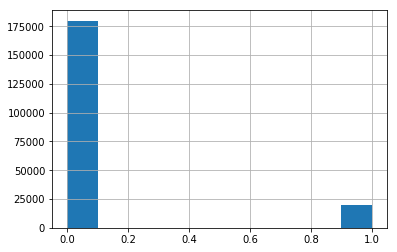

In [10]:
#distribution of traget variable
train['target'].hist()

In [11]:
#Detecting and deleting outliers from data
for i in colnames:
   
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
   
    
    train = train.drop(train[train.loc[:,i] < minimum].index)
    train = train.drop(train[train.loc[:,i] > maximum].index)

In [12]:
train.shape

(175073, 202)

In [ ]:
#correlation analysis

In [13]:
df1_corr = train.loc[:,colnames]

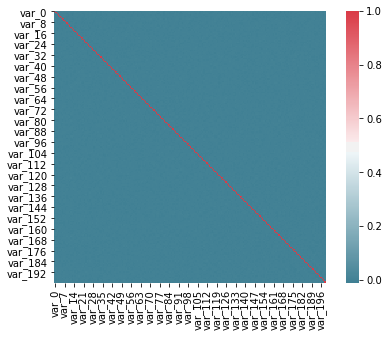

In [14]:
#Setting the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generating correlation matrix
corr = df1_corr.corr()

# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [15]:
#for visualization of normalization
cnames = train.iloc[:,2:25]

In [16]:
df = pd.DataFrame(cnames)
df.to_csv( "normalization.csv",index = False)
data = pd.read_csv("normalization.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FD210B8D0>,
      dtype=object)

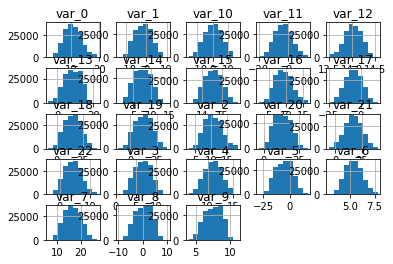

In [17]:
data.hist()

In [18]:
#Nomalisation
for j in cnames:
    #print(i)
    train[j] = (train[j] - min(train[j]))/(max(train[j]) - min(train[j]))

In [ ]:
#Model Development

In [19]:
#Importing Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
#replacing target categories with Yes or No
train['target'] = train['target'].replace(0, 'No')
train['target'] = train['target'].replace(1, 'Yes')

In [21]:
#Dividing data into train and test
X = train.values[:, 2:]
Y = train.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [22]:
#Decision Tree
Ctree_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predicting new test cases
Ctree_Predictions = Ctree_model.predict(X_test)

In [25]:
#building confusion matrix
# from sklearn.metrics import confusion_matrix 
# Con_mat = confusion_matrix(y_test, y_pred)
Con_mat = pd.crosstab(y_test, Ctree_Predictions)

#let us save TP, TN, FP, FN
TN = Con_mat.iloc[0,0]
FN = Con_mat.iloc[1,0]
TP = Con_mat.iloc[1,1]
FP = Con_mat.iloc[0,1]

In [26]:
#dt accuracy
((TP+TN)*100)/(TP+TN+FP+FN)

83.90404112523204

In [27]:
#dt precision
TP*100/(TP+FP)

19.005681818181817

In [28]:
#recall 
TP*100/(TP+FN)

19.368847712796757

In [29]:
#false Negative Rate
(FN*100)/(FN+TP)

80.63115228720324

In [ ]:
#decision tree
#accuracy = 83.3
#precision = 18.99
#recall = 19.0
#fnr = 80.9

In [30]:
#replacing target categories with 0 or 1
train['target'] = train['target'].replace('No',0)
train['target'] = train['target'].replace('Yes',1)

In [32]:
#Logistic Regression 

In [31]:
#Dividing data into train and test
X = train.values[:, 2:]
Y = train.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\aditya joshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = lr.predict(X_test)

In [43]:
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_aucc = metrics.auc(fpr, tpr)

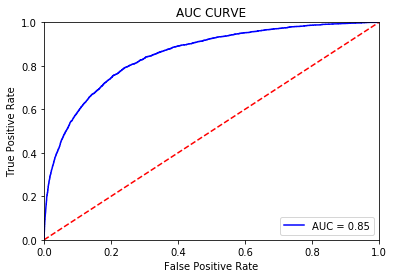

In [44]:
plt.title('AUC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_aucc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
#Building confusion matrix
Con_mat = pd.crosstab(y_test, y_pred)
#confusion_matrix(y_test, y_pred)

#let us save TP, TN, FP, FN
TN = Con_mat.iloc[0,0]
FN = Con_mat.iloc[1,0]
TP = Con_mat.iloc[1,1]
FP = Con_mat.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

91.48650578323576

In [40]:
#precision
TP*100/(TP+FP)

66.91900075700227

In [42]:
#recall 
TP*100/(TP+FN)

25.787631271878645

In [41]:
#false Negative Rate
(FN*100)/(FN+TP)

74.21236872812135

In [70]:
#Logestic Regression
#Accuracy = 91.4
#Precision = 67.7
#recall = 26.7
#FNR = 73.9
#AUC = 0.86

#accuracy = 83.3
#precision = 18.99
#recall = 19.0
#fnr = 80.9

(200000, 202)

In [10]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [11]:

#Naive Bayes implementation
NBay_model = GaussianNB().fit(X_train, y_train)

In [21]:
#predict test cases
NBay_Predictions = NBay_model.predict(test.iloc[:,1:])

In [23]:
result = pd.DataFrame(NBay_Predictions)

In [29]:
result = result.join(test['ID_code'])

In [40]:
df = result.to_csv( "result.csv",index = False)


In [21]:
#Build confusion matrix
Con_mat = pd.crosstab(y_test, NBay_Predictions)

#let us save TP, TN, FP, FN
TN = Con_mat.iloc[0,0]
FN = Con_mat.iloc[1,0]
TP = Con_mat.iloc[1,1]
FP = Con_mat.iloc[0,1]


#False Negative rate 
(FN*100)/(FN+TP)

65.16919486581097

In [22]:
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

92.12337569613022

In [23]:
#precision
TP*100/(TP+FP)

69.49941792782305

In [24]:
#recall
TP*100/(TP+FN)

34.830805134189035

In [ ]:
y_true = train.iloc[:,1]
y_probas = test['Actual_prob']
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [138]:
probs = NB_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

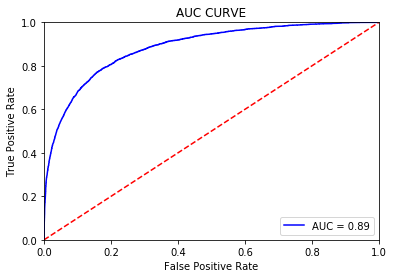

In [142]:
plt.title('AUC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Naivye Baiyse
#Accuracy = 92.2
#Precision = 71.6 
#recall = 35.8
#FNR = 63.1
#AUC = 0.89
